### Explore Data:

In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [63]:
df_test = pd.read_csv("Ttest.csv")
df_train = pd.read_csv("Ttrain.csv")

print(df_test.shape, df_train.shape)

(418, 11) (891, 12)


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Prepare data:

In [67]:
#Imputating missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
#Drop column 'Cabin' - the missing values in column 'Cabin' takes up more than 50% in traning set and testing set
#Drop unuseful columns
#Replace missing values in 'Age' with mean age
#Delete observations with missing values in 'Embarked'
df_trainc = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
df_testc = df_test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
df_trainc['Age'] = df_trainc['Age'].fillna(df_trainc['Age'].mean())
df_testc['Age'] = df_testc['Age'].fillna(df_testc['Age'].mean())
df_trainf = df_trainc.dropna(axis=0)
df_testf = df_testc.dropna(axis=0)

In [70]:
df_trainf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [71]:
df_testf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [72]:
#Converting string into categorical values
from sklearn.preprocessing import LabelEncoder
def encoding(df, string, label):
    gle = LabelEncoder()
    string_labels = gle.fit_transform(df[string])
    string_mappings = {index: label for index, label in enumerate(gle.classes_)}
    
    df[label] = string_labels.astype('int64')
    return ('Labels for {} are {}'.format(string, string_mappings))

In [73]:
#Convert the strings in the column 'Sex' and 'Embarked' into categorical values
encoding(df_trainf, 'Sex', 'SexLabel')
encoding(df_trainf, 'Embarked', 'EmbarkedLabel')
encoding(df_testf, 'Sex', 'SexLabel')
encoding(df_testf, 'Embarked', 'EmbarkedLabel')

df_trainf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    int64  
 1   Pclass         889 non-null    int64  
 2   Sex            889 non-null    object 
 3   Age            889 non-null    float64
 4   SibSp          889 non-null    int64  
 5   Parch          889 non-null    int64  
 6   Fare           889 non-null    float64
 7   Embarked       889 non-null    object 
 8   SexLabel       889 non-null    int64  
 9   EmbarkedLabel  889 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 76.4+ KB


In [74]:
df_testf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         417 non-null    int64  
 1   Sex            417 non-null    object 
 2   Age            417 non-null    float64
 3   SibSp          417 non-null    int64  
 4   Parch          417 non-null    int64  
 5   Fare           417 non-null    float64
 6   Embarked       417 non-null    object 
 7   SexLabel       417 non-null    int64  
 8   EmbarkedLabel  417 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 32.6+ KB


### Gain insights/ select features from visulization of cleaned dataset:

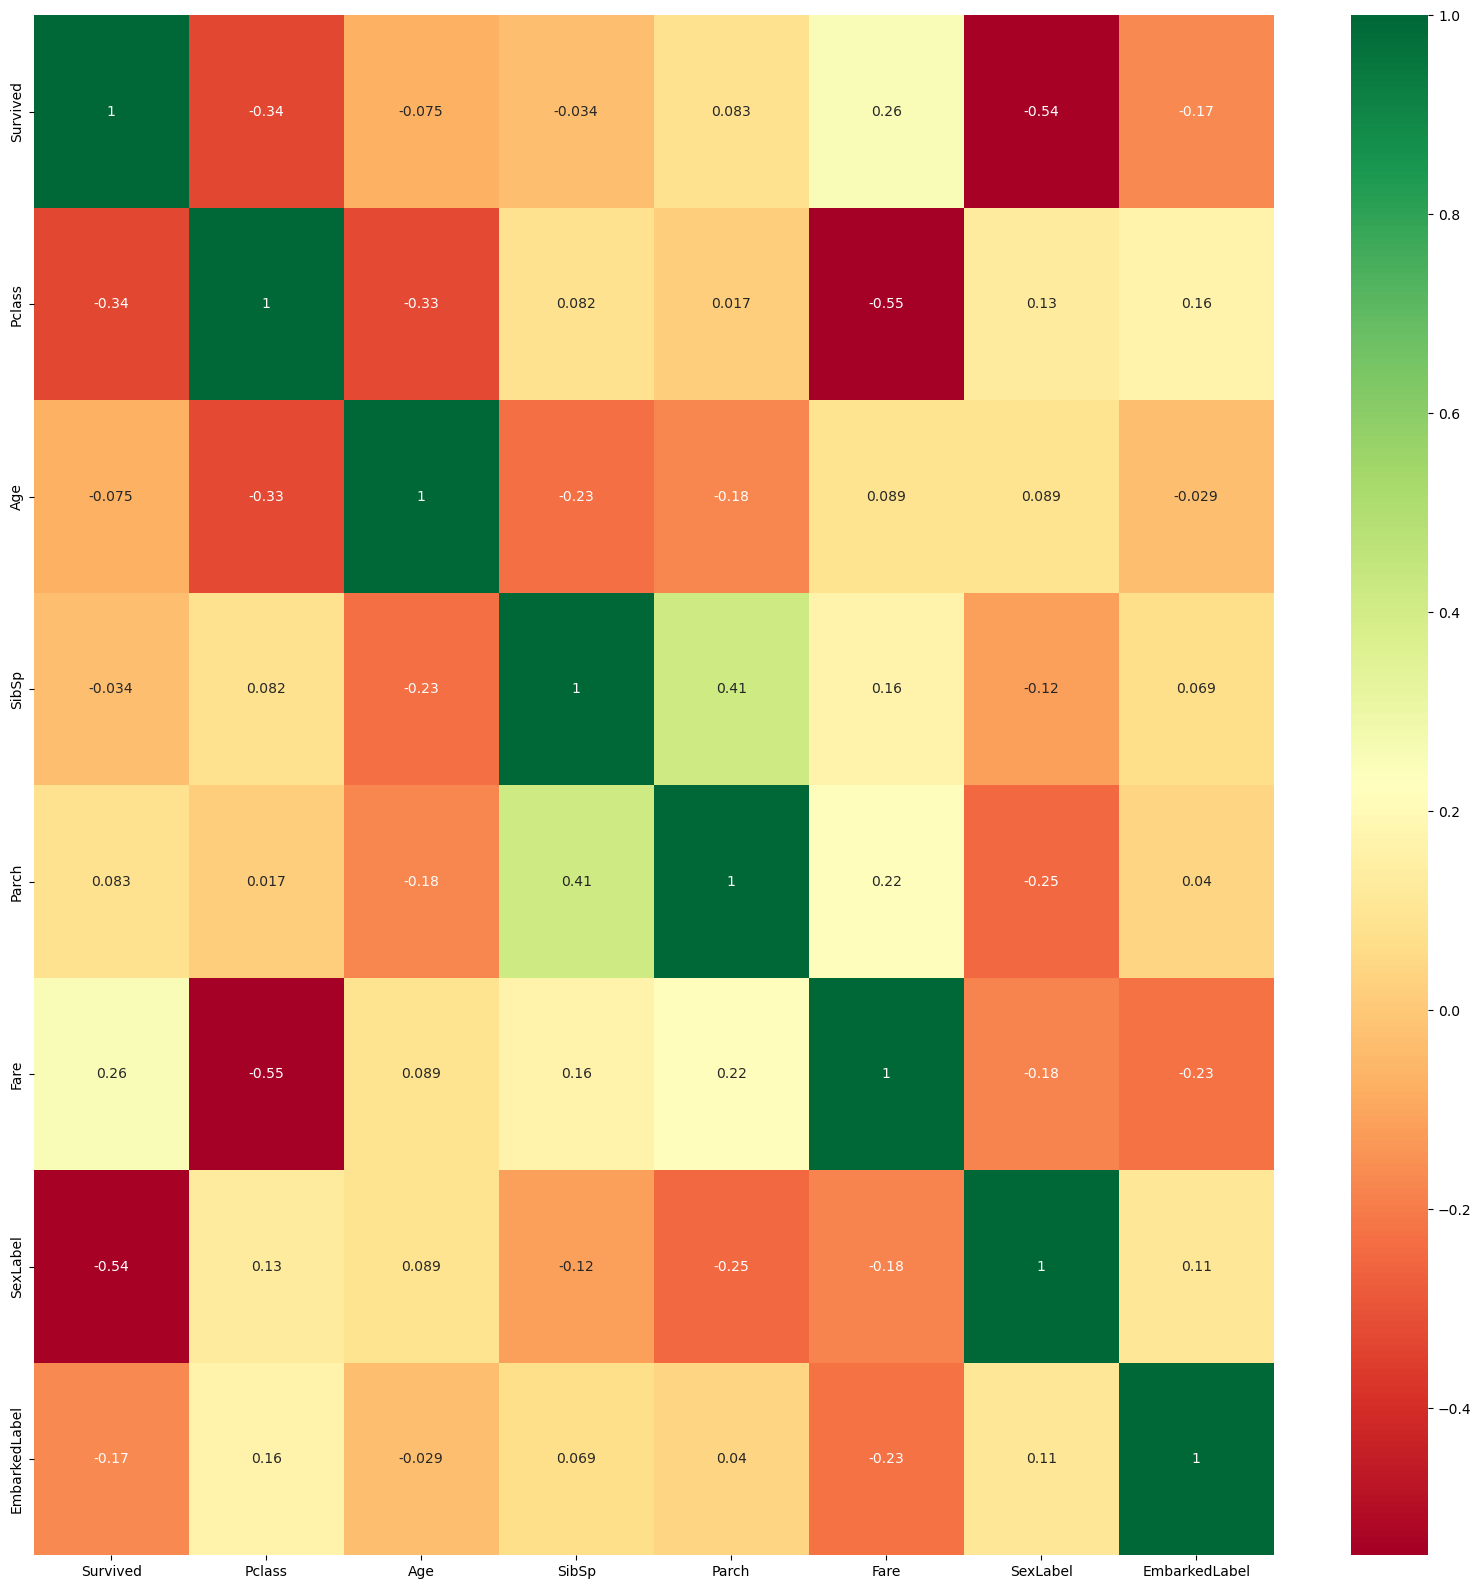

In [75]:
#Data visulization to get insights for fetures selecting
import seaborn as sns
corrmat = df_trainf.drop(['Sex', 'Embarked'], axis=1).corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df_trainf[top_corr_features].corr(), annot=True, cmap='RdYlGn')

I choose to drop column 'Age', 'SibSp' and 'Parch' as their correlation with Survived is smaller than 0.1 or bigger than -0.1, which means that their relationships with target value are not significant.

### Train data in KNN model and fine tune the model:

In [76]:
#Select all features as predictors
#Set up predictors and target in training set
X = df_trainf.drop(['Survived', 'Sex', 'Embarked', 'Age', 'SibSp', 'Parch'], axis=1)
y = df_trainf['Survived']

#Set up predictors in testing set
X_testset = df_testf.drop(['Sex', 'Embarked', 'Age', 'SibSp', 'Parch'], axis=1)

#Split training set into sub-taining set and sub-testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
#Set up KNN model with different values of neighbors
#Get scores of model for different values of neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
score_train = []
score_test = []
non = np.arange(1, 16)

for nok in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors=nok)
    clf.fit(X_train, y_train)
    score_train.append(clf.score(X_train, y_train))
    clf.fit(X_test, y_test)
    score_test.append(clf.score(X_test, y_test))

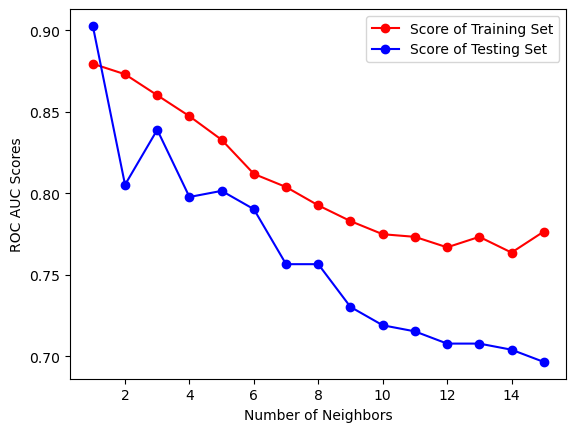

In [82]:
plt.plot(non, score_train, 'ro-', label='Score of Training Set')
plt.plot(non, score_test, 'bo-', label='Score of Testing Set')
plt.xlabel('Number of Neighbors')
plt.ylabel('ROC AUC Scores')
plt.legend()
plt.show()

### Final outcomes:

In [83]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
yhat_testset = clf.predict(X_testset)
print(yhat_testset)
print('Sum of survivers on testing set:', yhat_testset.sum(), 'persons')

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 0 1]
Sum of survivers on testing set: 172 persons
